# Setting up

In [ ]:
!gdown --id 1up7d8aWd0H-QDN2konB_4oAwa4oHJQr2
!gdown --id 1doKr_6jKH1kwFFCL92LhAHnDwHVmCQVK
!gdown --id 1mUoiYzyUs6ihlmkqskdPPgo0O1ainWqw
!mkdir ~/.demoji
!mv codes.json ~/.demoji/
!unzip wassa_dataset.zip
!rm wassa_dataset.zip
!pip install -qq demoji
!pip install -qq unidecode
!pip install -qq snowballstemmer

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1up7d8aWd0H-QDN2konB_4oAwa4oHJQr2
To: /content/wassa_dataset.zip
100% 364k/364k [00:00<00:00, 5.67MB/s]
/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1doKr_6jKH1kwFFCL92LhAHnDwHVmCQVK
To: /content/emoticons.csv
100% 6.02k/6.02k [00:00<00:00, 14.2MB/s]
/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import confusion_matrix
from nltk import PorterStemmer, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import unidecode
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import numpy as np
import itertools
from sklearn.naive_bayes import MultinomialNB, GaussianNB
import pickle
import snowballstemmer
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [3]:
nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

# Loading the dataset

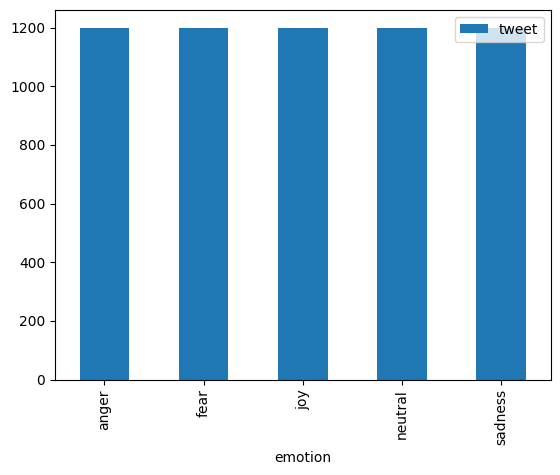

         tweet
emotion       
anger     1200
fear      1200
joy       1200
neutral   1200
sadness   1200


In [4]:
df_train = pd.read_csv("wassa_train.csv")
df_val = pd.read_csv("wassa_val.csv")
df_test = pd.read_csv("wassa_test.csv")
n_samples = df_train[["tweet", "emotion"]].groupby("emotion").count()
n_samples.plot(kind="bar")
plt.show()
print(n_samples)

In [5]:
labels = ['joy', 'anger', 'fear', 'sadness', 'neutral']

# Useful functions

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=False):

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(12, 8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.rcParams.update({'font.size': 15})
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)


    if normalize:
        cm_display = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    else:
        cm_display = cm


    thresh = cm_display.max() / 1.5 if normalize else cm_display.max() / 2

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm_display[i, j]),
                     horizontalalignment="center",
                     color="white" if cm_display[i, j] > thresh else "black")
        else:
            # Hiển thị số nguyên (dùng định dạng "d" hoặc "{:,}")
            plt.text(j, i, "{:,}".format(cm_display[i, j]),
                     horizontalalignment="center",
                     color="white" if cm_display[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    # Hiển thị Accuracy và Misclass ở dưới cùng
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))

    plt.show()


In [7]:
def preprocess_text(text, stop_words):
    # make lowercase and strip empty spaces
    result = text.lower()
    # strip extra spaces
    result = result.strip()
    # eliminate URLs
    result = re.result = re.sub(r"http\S+", "", result)
    # eliminate email addresses
    result = re.sub('\S*@\S*\s?', '', result)
    # strip diacritics
    result = unidecode.unidecode(result)
    # english stopwords
    word_list = word_tokenize(result)
    # english stemmer
    ps = SnowballStemmer("english")

    stemmed_sentence = ""
    for word in word_list:
        if word not in stop_words:
            stemmed_sentence += ps.stem(word)
            stemmed_sentence += " "

    result = stemmed_sentence
    whitelist = set('abcdefghijklmnopqrstuvwxyz ABCDEFGHIJKLMNOPQRSTUVWXYZ')
    result = ''.join(filter(whitelist.__contains__, result))
    result = ''.join([i for i in result if not i.isdigit()])
    return result

<>:9: SyntaxWarning: invalid escape sequence '\S'
<>:9: SyntaxWarning: invalid escape sequence '\S'
/tmp/ipython-input-3975347076.py:9: SyntaxWarning: invalid escape sequence '\S'
  result = re.sub('\S*@\S*\s?', '', result)


In [8]:
def preprocess_text_list(text_list, stop_words):
  for i,text in enumerate(text_list):
    text_list[i] = preprocess_text(text_list[i], stop_words)

In [9]:
def pickle_object(object, location):
    filehandler = open(location, "wb")
    pickle.dump(object, filehandler)
    filehandler.close()

def pickle_load_object(location):
    file = open(location, 'rb')
    object = pickle.load(file)
    file.close()
    return object

In [10]:
def compute_metrics(y_true, predictions):
  average = "macro"
  acc = accuracy_score(y_true, predictions)
  precision = precision_score(y_true, predictions, average=average)
  recall = recall_score(y_true, predictions, average=average)
  f1 = f1_score(y_true, predictions, average=average)
  print(f"Model has acc = {acc}\n, precision = {precision}\n, recall = {recall}\n, f1_score = {f1}\n")


# Preprocessing

In [11]:
train_texts = df_train["tweet"].tolist()
val_texts = df_val["tweet"].tolist()
test_texts = df_test["tweet"].tolist()


train_labels = df_train["emotion"].tolist()
val_labels = df_val["emotion"].tolist()
test_labels = df_test["emotion"].tolist()

train_labels[:10]

['joy',
 'anger',
 'neutral',
 'neutral',
 'anger',
 'joy',
 'neutral',
 'sadness',
 'sadness',
 'neutral']

## English

In [12]:
stop_words = stopwords.words("english")  # loads english stopwords

preprocess_text_list(train_texts, stop_words)
preprocess_text_list(val_texts,  stop_words)
preprocess_text_list(test_texts, stop_words)

train_texts[:10]

['kinda wish watch mischiev kiss play kiss ',
 'forget mention bought dreamboy ticket ',
 'yep  jimmi buffett ftw     jimmi need tweet word wisdom everi morn ',
 'blue sky   s still grey hazi window ',
 'move clip youtub tonight vigil held tulsa metropolitan baptist church  terencecruth  justic  sad ',
 'make success  happi forev ',
 'morn hon  breakfast  cant decid ',
 'standard candic start show pout  startasyoumeantogoon  gbbo ',
 '   would frown bit  fold arm  whi everi time m need assist someon expect lil   ',
 'someon make cofffeeeeee  ']

# Encoding

In [13]:
 # Vectorizing texts
 vectorizer = TfidfVectorizer()
 vectorizer.fit(train_texts)

TfidfVectorizer()

In [14]:
vectorized_train_texts = vectorizer.transform(train_texts)
vectorized_val_texts = vectorizer.transform(val_texts)
vectorized_test_texts = vectorizer.transform(test_texts)

In [15]:
# label encoding
label_encoder = LabelEncoder()
encoded_train_labels = label_encoder.fit_transform(train_labels)
encoded_val_labels = label_encoder.transform(val_labels)
encoded_test_labels = label_encoder.transform(test_labels)

# SVM

## Defining the model

In [16]:
svm_model = svm.SVC(probability=True)
svm_model.fit(vectorized_train_texts, encoded_train_labels)

SVC(probability=True)

## Validation

In [17]:
y_pred = svm_model.predict_log_proba(vectorized_val_texts)
y_pred

array([[-5.89641885e+00, -3.26949005e+00, -2.28323651e-01,
        -4.65698434e+00, -1.87169121e+00],
       [-6.95376103e+00, -2.33462873e-02, -6.71314918e+00,
        -3.96101909e+00, -6.28594016e+00],
       [-1.83344288e+01, -1.21595890e-04, -1.54574571e+01,
        -9.13498696e+00, -1.12085722e+01],
       ...,
       [-6.36186919e-01, -2.48489950e+00, -4.14946187e+00,
        -1.65163738e+00, -1.71562882e+00],
       [-5.10021366e+00, -5.91977355e+00, -9.33488688e-02,
        -2.79384226e+00, -3.95506577e+00],
       [-6.21504866e+00, -4.64837247e+00, -4.96335352e+00,
        -2.13344839e-01, -1.75125062e+00]])

In [18]:
acc = accuracy_score(encoded_val_labels, np.argmax(y_pred, axis=1))
precision = precision_score(encoded_val_labels, np.argmax(y_pred, axis=1), average="micro")
recall = recall_score(encoded_val_labels, np.argmax(y_pred, axis=1), average="micro")
f1 = f1_score(encoded_val_labels, np.argmax(y_pred, axis=1), average="micro")
print(f"Model has acc = {acc}\n, precision = {precision}\n, recall = {recall}\n, f1_score = {f1}\n")

Model has acc = 0.8706666666666667
, precision = 0.8706666666666667
, recall = 0.8706666666666667
, f1_score = 0.8706666666666667



## Testing

In [19]:
y_pred = svm_model.predict(vectorized_test_texts)

In [20]:
compute_metrics(encoded_test_labels, y_pred)


Model has acc = 0.8386666666666667
, precision = 0.8444967569787878
, recall = 0.8386666666666667
, f1_score = 0.8404916569671421



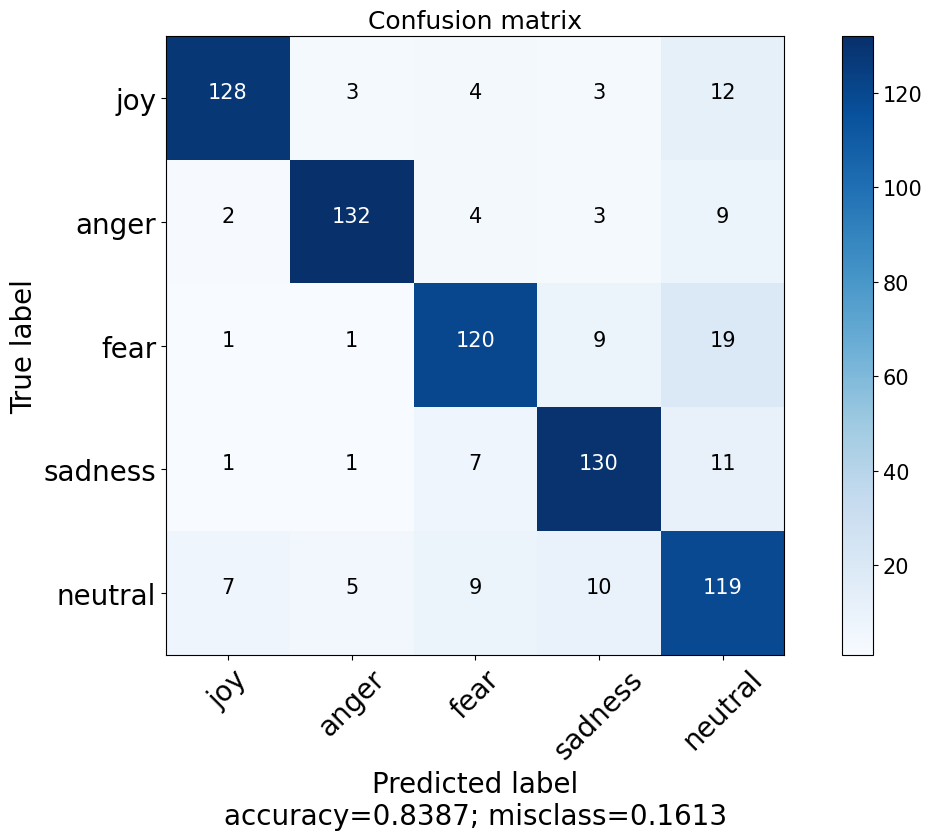

In [46]:

# y_pred = label_encoder.inverse_transform(y_pred)
if isinstance(y_pred[0], (int, np.integer)):
    y_pred_labels = label_encoder.inverse_transform(y_pred)
else:
    y_pred_labels = y_pred
cm = confusion_matrix(test_labels, y_pred, labels=labels)
plot_confusion_matrix(cm, labels)

In [22]:
print(classification_report(test_labels, y_pred))

              precision    recall  f1-score   support

       anger       0.93      0.88      0.90       150
        fear       0.83      0.80      0.82       150
         joy       0.92      0.85      0.89       150
     neutral       0.70      0.79      0.74       150
     sadness       0.84      0.87      0.85       150

    accuracy                           0.84       750
   macro avg       0.84      0.84      0.84       750
weighted avg       0.84      0.84      0.84       750



## Building SVM class

In [23]:
class SVM_model:
  def __init__(self, classifier, encoder, stop_words, vectorizer):
    self._classifier = classifier
    self._encoder = encoder
    self._stop_words = stop_words
    self._vectorizer = vectorizer

  def _preprocess_text(self, text, stop_words):
    # make lowercase and strip empty spaces
    result = text.lower()
    # strip extra spaces
    result = result.strip()
    # eliminate URLs
    result = re.result = re.sub(r"http\S+", "", result)
    # eliminate email addresses
    result = re.sub('\S*@\S*\s?', '', result)
    # strip diacritics
    result = unidecode.unidecode(result)
    # english stopwords
    word_list = word_tokenize(result)
    # english stemmer
    ps = SnowballStemmer("english")
    stemmed_sentence = ""
    for word in word_list:
        if word not in stop_words:
            stemmed_sentence += ps.stem(word)
            stemmed_sentence += " "
    result = stemmed_sentence
    whitelist = set('abcdefghijklmnopqrstuvwxyz ABCDEFGHIJKLMNOPQRSTUVWXYZ')
    result = ''.join(filter(whitelist.__contains__, result))
    result = ''.join([i for i in result if not i.isdigit()])
    return result

  def _vectorize_texts(self, texts):
    vectorized_texts = []
    for text in texts:
      processed_text = self._preprocess_text(text, self._stop_words)
      vectorized_texts.append(processed_text)
    return self._vectorizer.transform(vectorized_texts)

  def detect_emotions_with_labels(self, texts):
    vectorized_texts = self._vectorize_texts(texts)
    predictions = self._classifier.predict_log_proba(vectorized_texts)
    predictions  = list(self._encoder.inverse_transform(np.argmax(predictions, axis=1)))
    return predictions

  def detect_emotions_with_proba(self, texts):
    vectorized_texts = self._vectorize_texts(texts)
    predictions = self._classifier.predict_log_proba(vectorized_texts)
    return predictions

  def proba_to_labels(self, proba):
      labels  = list(self._encoder.inverse_transform(np.argmax(proba, axis=1)))
      return labels

<>:16: SyntaxWarning: invalid escape sequence '\S'
<>:16: SyntaxWarning: invalid escape sequence '\S'
/tmp/ipython-input-1222258803.py:16: SyntaxWarning: invalid escape sequence '\S'
  result = re.sub('\S*@\S*\s?', '', result)


In [24]:
svm_cls = SVM_model(svm_model, label_encoder, stop_words, vectorizer)

In [25]:
predictions = svm_cls.detect_emotions_with_labels(val_texts)
acc = accuracy_score(val_labels, predictions)
acc

0.8706666666666667

## Testing


In [26]:
preds = svm_cls.detect_emotions_with_labels(test_texts)

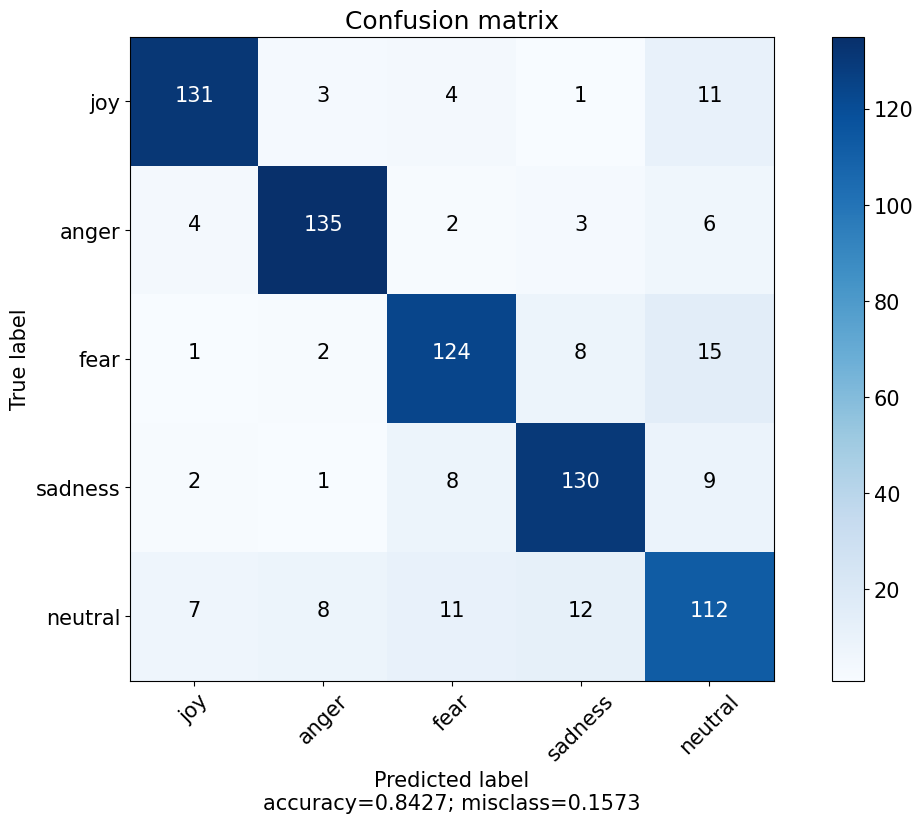

In [47]:
cm = confusion_matrix(test_labels, preds, labels=labels)
plot_confusion_matrix(cm, labels)

In [28]:
print(classification_report(test_labels, y_pred))

              precision    recall  f1-score   support

       anger       0.93      0.88      0.90       150
        fear       0.83      0.80      0.82       150
         joy       0.92      0.85      0.89       150
     neutral       0.70      0.79      0.74       150
     sadness       0.84      0.87      0.85       150

    accuracy                           0.84       750
   macro avg       0.84      0.84      0.84       750
weighted avg       0.84      0.84      0.84       750



## Saving the model

In [29]:
pickle_object(svm_cls, "svm_model.obj")

In [30]:
svm_cls = pickle_load_object("svm_model.obj")

In [31]:
preds = svm_cls.detect_emotions_with_labels(test_texts)

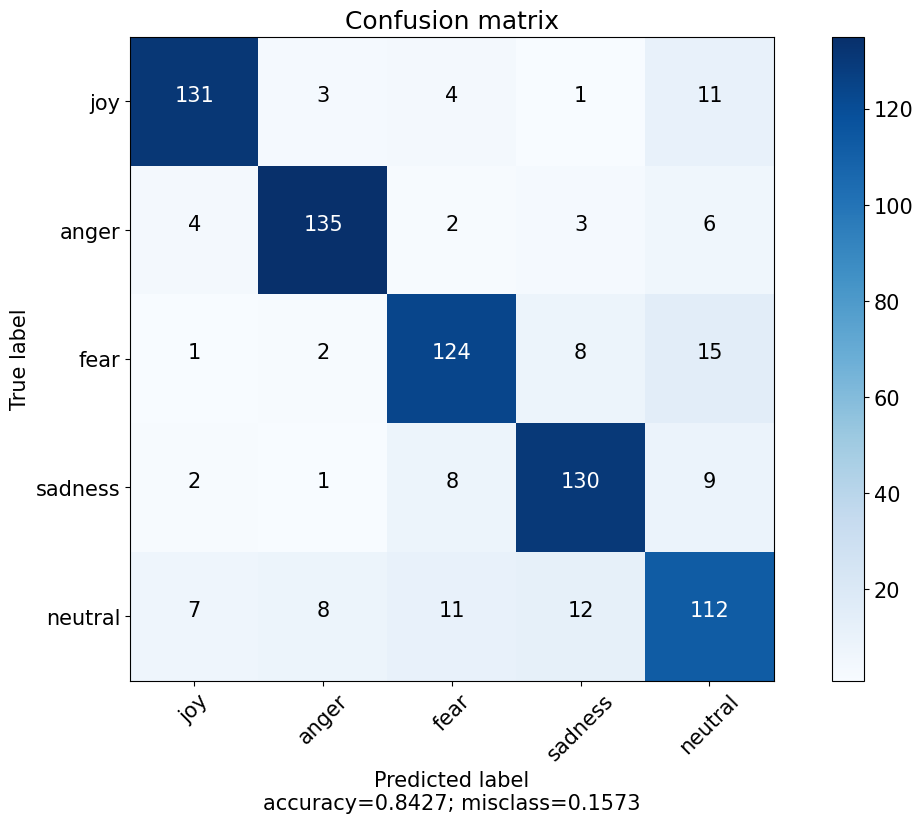

In [48]:
cm = confusion_matrix(test_labels, preds, labels=labels)
plot_confusion_matrix(cm, labels)

# Multinomial Naive bayes

In [33]:
mnb = MultinomialNB(alpha=1)
mnb.fit(vectorized_train_texts, encoded_train_labels)

MultinomialNB(alpha=1)

In [34]:
preds_val = mnb.predict(vectorized_val_texts)

In [35]:
preds_test = mnb.predict(vectorized_test_texts)

In [36]:
compute_metrics(encoded_val_labels, preds_val)

Model has acc = 0.7826666666666666
, precision = 0.7833875616383951
, recall = 0.7826666666666666
, f1_score = 0.7774387339598252



In [37]:
compute_metrics(encoded_test_labels, preds_test)

Model has acc = 0.78
, precision = 0.7785008337244983
, recall = 0.78
, f1_score = 0.7769269528896695



# Gaussian Naive Bayes

In [38]:
gaussian_nb = GaussianNB(var_smoothing=5e-1)
gaussian_nb

GaussianNB(var_smoothing=0.5)

In [39]:
x = vectorized_train_texts.toarray()

In [40]:
gaussian_nb.fit(x, encoded_train_labels)

GaussianNB(var_smoothing=0.5)

In [41]:
preds_val = gaussian_nb.predict(vectorized_val_texts.toarray())
preds_test = gaussian_nb.predict(vectorized_test_texts.toarray())

In [42]:
compute_metrics(encoded_val_labels, preds_val)

Model has acc = 0.7053333333333334
, precision = 0.7477872710093605
, recall = 0.7053333333333335
, f1_score = 0.7107362322002708



In [43]:
compute_metrics(encoded_test_labels, preds_test)

Model has acc = 0.7026666666666667
, precision = 0.7448890961141931
, recall = 0.7026666666666667
, f1_score = 0.7090340679709878

